<a href="https://colab.research.google.com/github/Anjali-Narwaria/Healthcare-Appointment-No-Show-Prediction-Project/blob/main/Healthcare_Appointment_No_Show_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Objective**

The goal is to predict whether a patient will miss an appointment (No-Show) based on past behavior and demographic or scheduling factors, and then visualize trends to improve scheduling efficiency.

Key objectives:

* Build a model using Python to classify “Show” vs “No-Show”.

* Analyze how features like SMS reminders, age, weekday, and medical conditions affect attendance.

* Create a Power BI dashboard for managerial insights.

In [1]:
# Import Dataset
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/KaggleV2-May-2016.csv')
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [3]:
# Data Cleaning & Preprocessing

# Fix inconsistent column names (e.g., change Hipertension → Hypertension).
df.rename(columns={'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)

# Remove unnecessary columns like PatientId and AppointmentID.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# Convert date columns to datetime format.
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.tz_convert(None) # Remove timezone information
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.tz_convert(None) # Remove timezone information

# Handle invalid values (e.g., replace negative ages with 0).
df['Age'] = df['Age'].apply(lambda x: 0 if x < 0 else x)

# Create new columns:
# WaitingTime = (AppointmentDay - ScheduledDay).days
df['WaitingTime'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# DayOfWeek = AppointmentDay.dt.day_name()
df['DayOfWeek'] = df['AppointmentDay'].dt.day_name()


# Convert target column: No-show → binary (1 = no-show, 0 = show).
df['NoShow'] = df['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

# Remove original 'No-show' column
df.drop('No-show', axis=1, inplace=True)

display(df.head())

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitingTime,DayOfWeek,NoShow
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,-1,Friday,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,-1,Friday,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,-1,Friday,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,-1,Friday,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,-1,Friday,0


#  **Exploratory Data Analysis (EDA)**

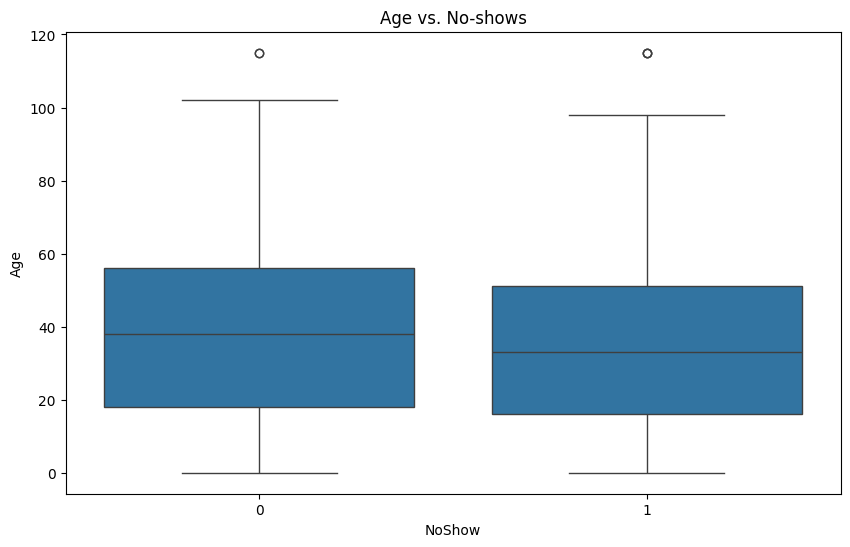

In [6]:
# Understand relationships between features and attendance behavior.
import matplotlib.pyplot as plt
import seaborn as sns

# Use visualizations to find patterns:

# Age vs. No-shows
plt.figure(figsize=(10, 6))
sns.boxplot(x='NoShow', y='Age', data=df)
plt.title('Age vs. No-shows')
plt.show()

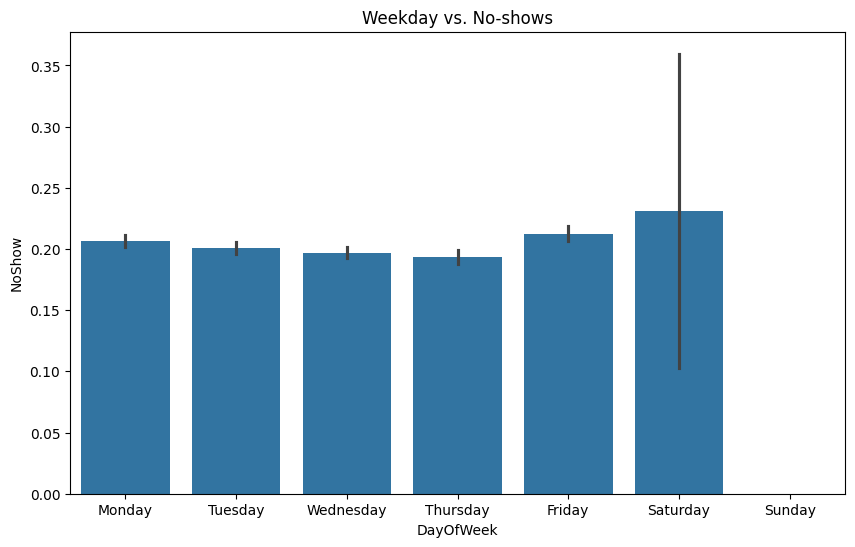

In [8]:
# Weekday vs. No-shows
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='NoShow', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Weekday vs. No-shows')
plt.show()


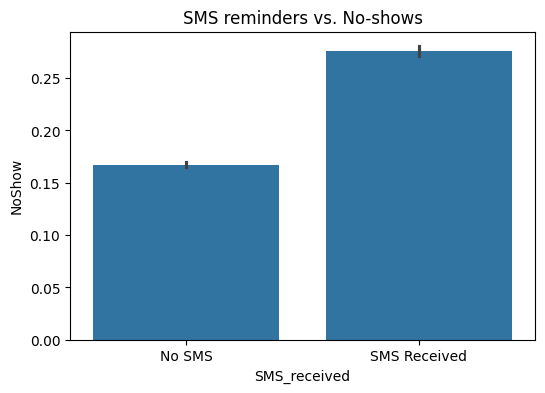

In [10]:
# SMS reminders vs. No-shows
plt.figure(figsize=(6, 4))
sns.barplot(x='SMS_received', y='NoShow', data=df)
plt.title('SMS reminders vs. No-shows')
plt.xticks([0, 1], ['No SMS', 'SMS Received'])
plt.show()

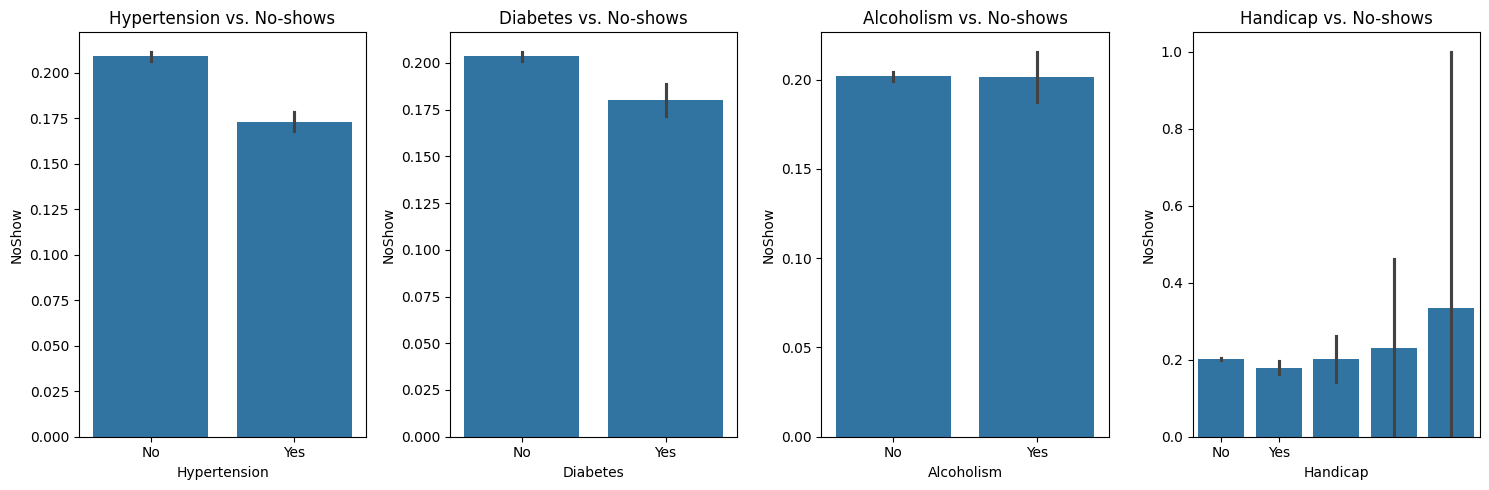

In [18]:
# Medical conditions impact (Hypertension, Diabetes, Alcoholism, Handicap)
medical_conditions = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
plt.figure(figsize=(15, 5))
for i, col in enumerate(medical_conditions):
    plt.subplot(1, 4, i + 1)
    sns.barplot(x=col, y='NoShow', data=df)
    plt.title(f'{col} vs. No-shows')
    plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()

In [26]:
# Prepare features for modeling.

X = df.drop('NoShow', axis=1)
y = df['NoShow']

In [27]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (88421, 14)
X_test shape: (22106, 14)
y_train shape: (88421,)
y_test shape: (22106,)


In [28]:
# Fit a Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Interpret feature importance
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)

Accuracy: 0.7515

Feature Importance:
WaitingTime            0.377728
Age                    0.301091
Gender_M               0.056681
DayOfWeek_Tuesday      0.037682
DayOfWeek_Wednesday    0.036706
DayOfWeek_Monday       0.031790
DayOfWeek_Thursday     0.031217
Hypertension           0.030429
Scholarship            0.028013
SMS_received           0.022749
Diabetes               0.019784
Handicap               0.014964
Alcoholism             0.010550
DayOfWeek_Saturday     0.000616
dtype: float64


In [33]:
# Saving your processed dataset or predictions as CSV:
final_df = X_test.copy()
final_df['Predicted_NoShow'] = y_pred
final_df.to_csv('predictions.csv', index=False)

# Download the file after execution
from google.colab import files
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>